In [39]:
import numpy as np
import pandas as pd
import os

In [40]:
train_data = pd.read_csv("../data/train.csv")
y_train = train_data["Survived"]
X_train = train_data.drop("Survived", axis=1)

X_test = pd.read_csv("../data/test.csv")
y_test = pd.read_csv("../data/gender_submission.csv")
y_test = np.array(y_test.drop("PassengerId", axis=1))

print("Train info:")
print(X_train.info())
print("Test info:")
print(X_test.info())

Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
None
Test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-n

In [41]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
age_mean = int(X_train["Age"].mean() + 0.5)
print(f"Ortalama yaş değeri: {age_mean}")

X_train["Age"] = X_train["Age"].fillna(age_mean)
X_train.info()

age_mean = (X_test["Age"].mean() + 0.5)

print(f"Test veris seti ortalama yaş: {age_mean}")
X_test["Age"] = X_test["Age"].fillna(age_mean)
X_test.info()

Ortalama yaş değeri: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
Test veris seti ortalama yaş: 30.772590361445783
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 no

In [43]:
# Cabin numarası olmayanları 0 ile dolduruyorum. Bu feature'ı da bir sınıf olarak kabul edeceğim.

X_train['Has_Cabin'] = np.where(X_train['Cabin'].notnull(), 1, 0)
X_test['Has_Cabin'] = np.where(X_test['Cabin'].notnull(), 1, 0)

X_train.drop('Cabin', axis=1, inplace=True)
X_test.drop('Cabin', axis=1, inplace=True)

X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  Has_Cabin    891 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 73.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2 

In [44]:
# Embarked feature'ı tamamen kaldırıyorum. Binilen yerin hayatta kalma ile orantılı olduğunu düşünmüyorum.
# Ayrıca buna benzer olarak hayatta kalma ile iliglis olmayan diğer feature'ları da kaldırıyorum.

X_train.drop(["Embarked", "Ticket", "PassengerId", "Name"], axis=1, inplace=True)
X_test.drop(["Embarked", "Ticket", "PassengerId", "Name"], axis=1, inplace=True)

# X_test deki boş olan Fare feature'ını ortalama değer ile değiştiriyoruz.

mean_fare = round(X_test["Fare"].mean(), 4)
print(f"X_test mean fare: {mean_fare}")
X_test["Fare"] = X_test["Fare"].fillna(mean_fare)

X_test.info()
X_train.info()

## Veri setimiz artık daha temiz. Şimdi ölçeklendirme aşamasına geçebiliriz.

X_test mean fare: 35.6272
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Sex        418 non-null    object 
 2   Age        418 non-null    float64
 3   SibSp      418 non-null    int64  
 4   Parch      418 non-null    int64  
 5   Fare       418 non-null    float64
 6   Has_Cabin  418 non-null    int32  
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 21.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     891 non-null    int64  
 1   Sex        891 non-null    object 
 2   Age        891 non-null    float64
 3   SibSp      891 non-null    int64  
 4   Parch      891 non-null    int64  
 5   Fare       891 non-null    float64
 6   Has_Cabi

In [45]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Ölçeklendirme feature'ın sayısal mı yoksa kategorik mi olduğuna göre değişiklik gösterecektir. O yüzden onları ayırıyorum.
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

print("Sayısal Sütunlar:", list(numerical_features))
print("Kategorik Sütunlar:", list(categorical_features))


# Pipeline => Burada imputer fonksiyonu eğer dataset içerisinde null sayısal değişkenler var ise onları ortalama değer ile doldurulmasını sağlar.
# Biz bunu yukarıda manuel olrak yapmış olsak da burada tek parça halinde nasıl yapılır onu gösterdim.
# Sayısal dönüşümler/ Reçete...
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Burada kullanılan imputer ise none/null verileri en sık tekrar (mod) eden ile doldurur.
# One Hot Encoder, kategorik değişkenler için bir ölçeklendirme yöntemidir. String verileri, numeric sütunlara çevirir. Label Encoding'den farklıdır. Modelleri eğitmek için daha sağlam bir yöntem.
# handle_unknown='ignore' -> test setinde eğitimde görülmeyen bir kategori olursa hata vermeden onu görmezden gelmesini sağlar.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Pipeline'ları birleştirme
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Belirtilmeyen sütunlara ne yapılacağını söyler (burada dokunma/geç diyoruz)
)

# Ölçeklenmiş veriler... Artık
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Result
print("\nOrijinal Eğitim Verisi Boyutu:", X_train.shape)
print("Ölçeklenmiş Eğitim Verisi Boyutu:", X_train_scaled.shape)
print("\nÖlçeklenmiş Veri (İlk 5 Satır):")

scaled_df = pd.DataFrame(X_train_scaled, columns=preprocessor.get_feature_names_out())
scaled_df.info()

scaled_df

Sayısal Sütunlar: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Kategorik Sütunlar: ['Sex']

Orijinal Eğitim Verisi Boyutu: (891, 7)
Ölçeklenmiş Eğitim Verisi Boyutu: (891, 8)

Ölçeklenmiş Veri (İlk 5 Satır):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num__Pclass           891 non-null    float64
 1   num__Age              891 non-null    float64
 2   num__SibSp            891 non-null    float64
 3   num__Parch            891 non-null    float64
 4   num__Fare             891 non-null    float64
 5   cat__Sex_female       891 non-null    float64
 6   cat__Sex_male         891 non-null    float64
 7   remainder__Has_Cabin  891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,remainder__Has_Cabin
0,0.827377,-0.597055,0.432793,-0.473674,-0.502445,0.0,1.0,0.0
1,-1.566107,0.634162,0.432793,-0.473674,0.786845,1.0,0.0,1.0
2,0.827377,-0.289251,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0
3,-1.566107,0.403309,0.432793,-0.473674,0.420730,1.0,0.0,1.0
4,0.827377,0.403309,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
886,-0.369365,-0.212299,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0
887,-1.566107,-0.827908,-0.474545,-0.473674,-0.044381,1.0,0.0,1.0
888,0.827377,0.018554,0.432793,2.008933,-0.176263,1.0,0.0,0.0
889,-1.566107,-0.289251,-0.474545,-0.473674,-0.044381,0.0,1.0,1.0


### KNN ile Model Eğitimi

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=9) # HyperParametre'yi default olarak 9 alıyoruz. Bunu daha sonra optimize edeceğiz.
knn.fit(X=X_train_scaled, y=y_train)

y_pred = knn.predict(X=X_test_scaled)

score = accuracy_score(y_pred=y_pred, y_true=y_test)

print(f"Score: {score}")

Score: 0.8899521531100478


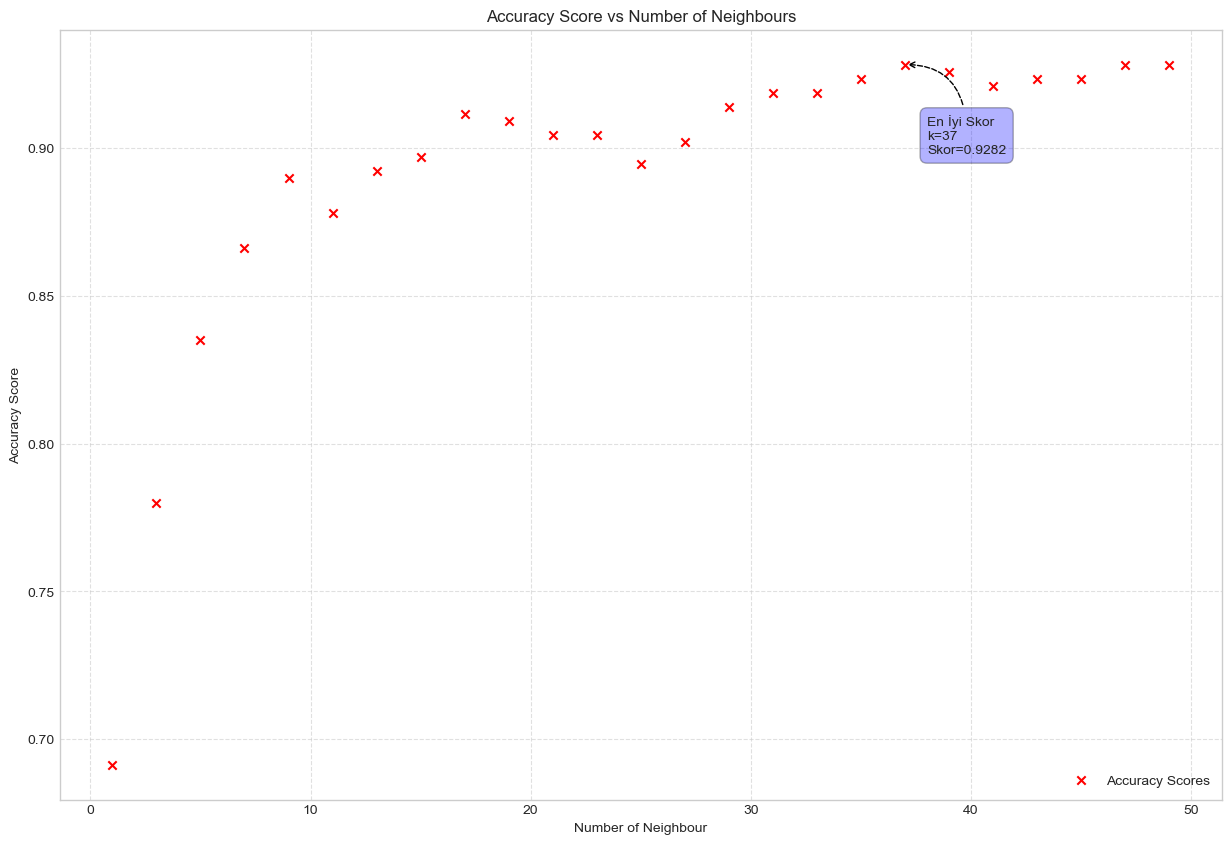

In [47]:
# Hyperparameter Optimization
import matplotlib.pyplot as plt

score_list = []
n_neighbours = range(1, 50, 2)
for n_neighbour in n_neighbours:
    new_knn = KNeighborsClassifier(n_neighbors=n_neighbour)
    new_knn.fit(X=X_train_scaled, y=y_train)

    y_pred = new_knn.predict(X=X_test_scaled)
    score = accuracy_score(y_pred=y_pred, y_true=y_test)
    score_list.append(score)

max_score_idx = np.argmax(score_list)
best_score = score_list[max_score_idx]
best_n_neighbour = n_neighbours[max_score_idx]

plt.figure(figsize=(15, 10))
plt.scatter(x=n_neighbours, y=score_list, c="red", marker="x", label="Accuracy Scores")
plt.annotate(
    text=f'En İyi Skor\nk={best_n_neighbour}\nSkor={best_score:.4f}', # İşaretin metni
    xy=(best_n_neighbour, best_score), # Okun ucu nereyi gösterecek (x,y)
    xytext=(best_n_neighbour + 1, best_score - 0.03), # Metin nerede duracak (x,y)
    arrowprops=dict(arrowstyle='->', color='black', linewidth=1.0, linestyle='--',connectionstyle="angle3"), # Okun stili
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.5", fc="blue", alpha=0.3) # Metin kutusu stili
)
plt.title("Accuracy Score vs Number of Neighbours")
plt.xlabel("Number of Neighbour")
plt.ylabel("Accuracy Score")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Grafikte görüldüğü üzere k = 41 değeri, algoritma için en optimum değer olarak gözüküyor.

### Desicion Tree ile Model Eğitimi

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

tree_clf = DecisionTreeClassifier(criterion="gini", max_depth=6, random_state=42)
tree_clf.fit(X_train_scaled, y_train)

y_pred = tree_clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.8373205741626795


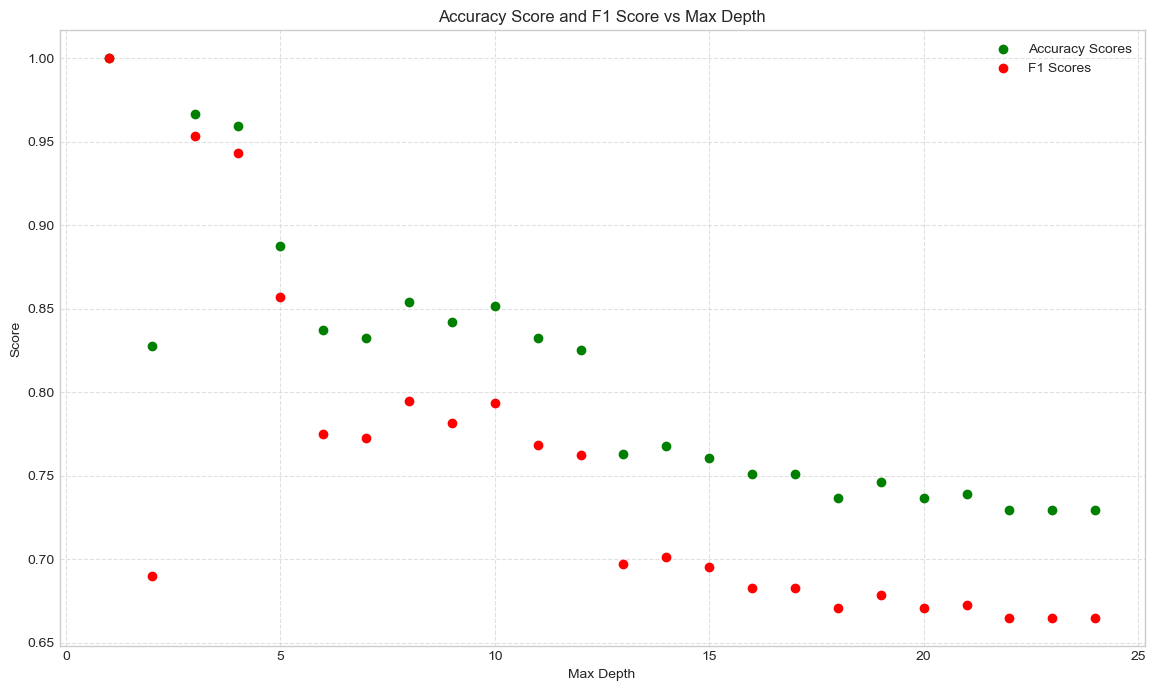

In [49]:
max_depths = range(1, 25, 1)
acc_list = []
f1_score_list = []

for idx, max_depth in enumerate(max_depths):
    tree_clf = DecisionTreeClassifier(criterion="gini", max_depth=max_depth, random_state=42)
    tree_clf.fit(X_train_scaled, y_train)

    y_pred = tree_clf.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f1_score_list.append(f1)
    acc_list.append(accuracy)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14,8))
plt.scatter(x=max_depths, y=acc_list, c="green", label="Accuracy Scores")
plt.scatter(x=max_depths, y=f1_score_list, c="red", label="F1 Scores")

plt.title("Accuracy Score and F1 Score vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Burada max depth 1 olduğunda hepsinin doğru çıkma sebebi test veri setinde erkek olup hayatta kalan yok ve kadın olup ölen yok.
# Grafiğe bakılarak 3, 4 ve 5 değerlerinden birisi hyperparameter olarak seçilebilir.